
# Linear Discriminant Analysis

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns

In [109]:
class LDA():
    def __init__(self,n_components):
        self.n_components=n_components
        self.eigenvectors=None
        self.eigenvalues=None
    
    def fit(self,X,y):
        n_features=X.shape[1]
        
        S_w=np.zeros((n_features,n_features))
        S_b=np.zeros((n_features,n_features))
        
        m_overall=np.mean(X,axis=0)
        
        for c in np.unique(y):
            new_X=X[y==c]
            mean_i=np.mean(new_X,axis=0)
            n=new_X.shape[0]
            
            #(4,rowsX)@(rows,4)
            S_i=((new_X-mean_i).T.values)@((new_X-mean_i).values)
            S_w+=S_i
            
            mean_diff=np.array((mean_i-m_overall)).reshape(n_features,1)
            S_i=n*((mean_diff)@(mean_diff).T)
            S_b+=S_i
        
        
        self.eigenvalues,self.eigenvectors = np.linalg.eig(np.linalg.inv(S_w)@S_b)
        idx=np.argsort(abs(self.eigenvalues))[::-1]
        self.eigenvectors=self.eigenvectors.T
        
        
        self.W=self.eigenvectors[idx[:self.n_components]]
        
        
    def transform(self,X):
        
        # (ncompo,n_features) X (n_features,kfeatures)
        return X@self.W.T

In [110]:
model=LDA(2)

from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [111]:
iris=pd.read_csv("iris.csv")
X=pd.DataFrame(std.fit_transform(iris.iloc[:,1:-1]))
y=iris.iloc[:,-1]
model.fit(X,y)

df=model.transform(X)
df['class']=y

<AxesSubplot: xlabel='0', ylabel='1'>

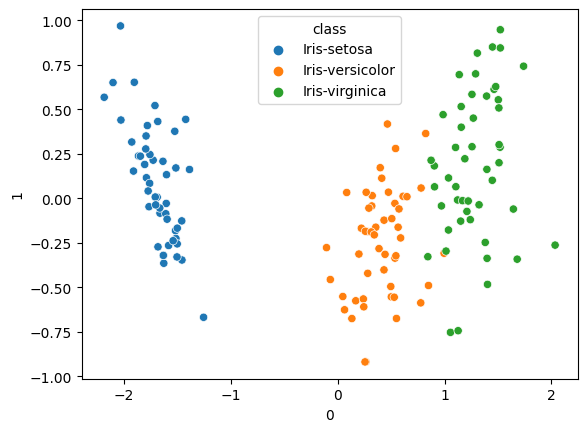

In [112]:
sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,1],hue=df['class'],data=df)

<AxesSubplot: xlabel='0', ylabel='1'>

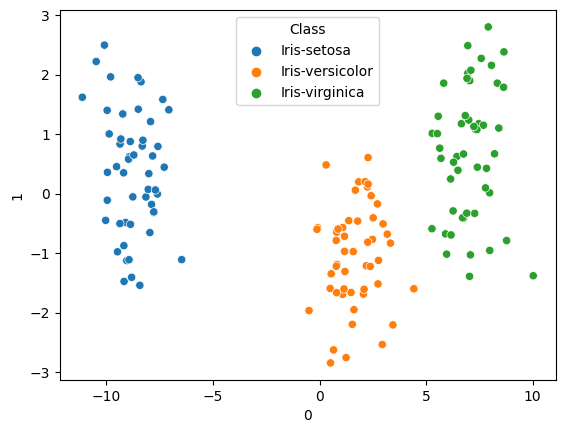

In [90]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as skLDA

sklearn_lda=skLDA(n_components=2)
sklearn_df=pd.DataFrame(sklearn_lda.fit_transform(iris.iloc[:,:-1],iris.iloc[:,-1]))
sklearn_df['Class']=iris.iloc[:,-1]

sns.scatterplot(x=sklearn_df.iloc[:,0],y=sklearn_df.iloc[:,1],data=sklearn_df,hue=sklearn_df['Class'])
# sklearn_df